In [1]:
import numpy as np
from sif.kernels import BrownianMotionKernel
from sif.models import GaussianProcess
from sif.samplers import multivariate_normal_sampler

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

As a first experiment, let's sample from the Brownian motion prior in order to visualize the process.

In [3]:
X = np.linspace(1e-5, 1, num=1000)
X = np.atleast_2d(X).T

Create the Gaussian process object. Notice that Brownian motion is typically constrained to have an initial position at zero.

In [4]:
n_samples = 100

In [5]:
length_scales = np.array([1., ])
H = 0.5
kernel = BrownianMotionKernel(H=H, length_scales=length_scales)
C = kernel.cov(X)
m = np.zeros((X.shape[0], ))
samples = multivariate_normal_sampler(m, C, n_samples=n_samples)

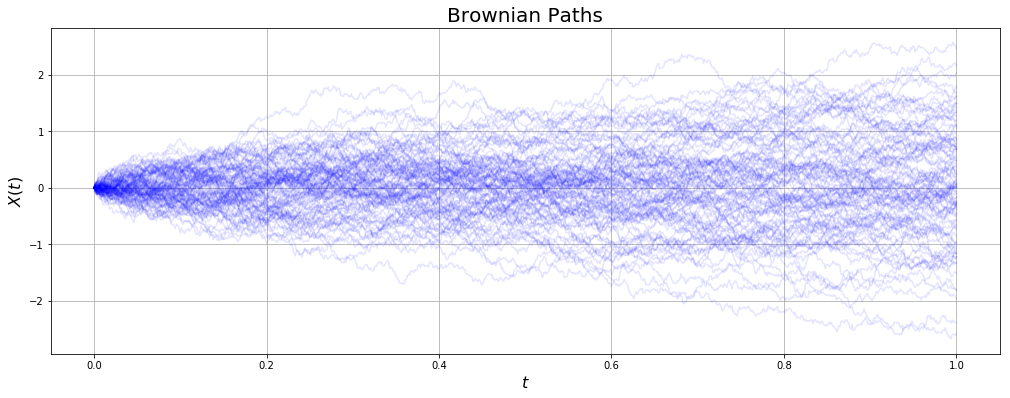

In [6]:
plt.figure(figsize=(17, 6))
for i in range(n_samples):
    plt.plot(X.ravel(), samples[i], "b-", alpha=0.1)
plt.grid()
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$X(t)$", fontsize=16)
plt.title("Brownian Paths", fontsize=20)
plt.show()

Now we'll try to do posterior inference with the Brownian motion.

In [7]:
X = np.random.uniform(size=(50, 1))
X_pred = np.atleast_2d(np.linspace(1e-5, 2., num=1000)).T
C = kernel.cov(X)
m = np.zeros((X.shape[0], ))
y = multivariate_normal_sampler(m, C, n_samples=1).ravel()

Create the Gaussian process object.

In [8]:
noise_level = 1e-5
gp = GaussianProcess(kernel, noise_level)
gp.fit(X, y)

Now we will produce the posterior expectation and variance of the Gaussian process under a fixed hyperparameter configuration. In this section, we'll also draw samples from the predictive posterior distribution of the Gaussian process.

In [9]:
mean_pred, cov_pred = gp.predict(X_pred)
std_pred = np.sqrt(np.diag(cov_pred))

In [10]:
n_samples = 100
samples = gp.sample(X_pred, n_samples)

Visualize how well the samples conform to the expectation and variance characterization of the posterior.

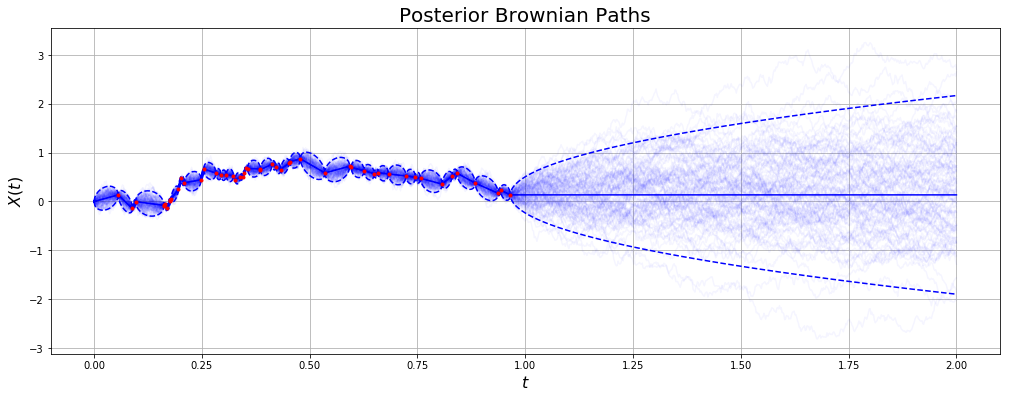

In [11]:
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), mean_pred.ravel(), "b-")
plt.plot(X_pred.ravel(), mean_pred.ravel() + 2. * std_pred, "b--")
plt.plot(X_pred.ravel(), mean_pred.ravel() - 2. * std_pred, "b--")
for i in range(n_samples):
    plt.plot(X_pred.ravel(), samples[i], "b-", alpha=0.04)
plt.plot(X.ravel(), y.ravel(), "r.")
plt.grid()
plt.xlabel("$t$", fontsize=16)
plt.ylabel("$X(t)$", fontsize=16)
plt.title("Posterior Brownian Paths", fontsize=20)
plt.show()

In [12]:
gp.log_likelihood

42.23876517552703